In [1]:
%matplotlib inline 
import warnings
import matplotlib
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from utils import utils
# ignore some boring warning
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [2]:
# scegli la regione che ti interessa
regione = "Emilia-Romagna"

# scegli la percentuale target e il giorno nella quale dovrebbe essere raggiunta
target_perc_pop_vax = 10
target_date = datetime.strptime("2021-04-01", "%Y-%m-%d")

code, pop, rg, df,it_pop = utils.get_data(regione)

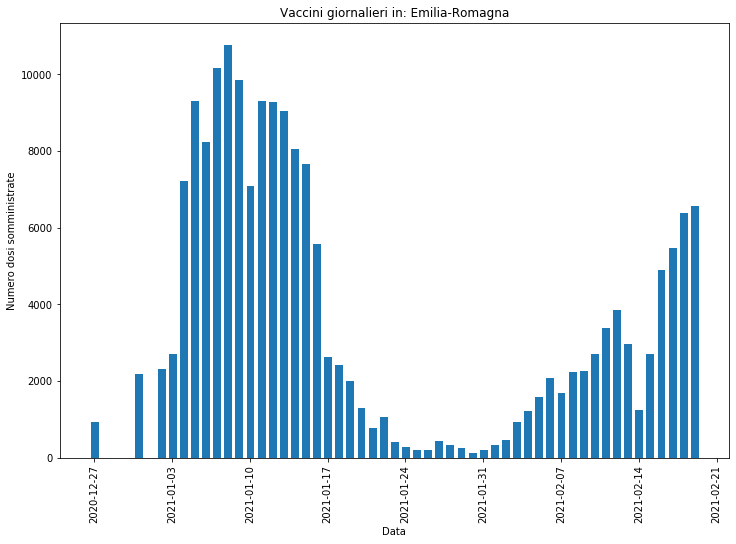

In [3]:
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(rg["data_somministrazione"], rg["prima_dose"], align='center', edgecolor='white')
ax.xaxis_date()
plt.xlabel('Data')
plt.ylabel('Numero dosi somministrate')
plt.xticks(rotation=90)
plt.title('Vaccini giornalieri in: ' + regione)
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
plt.show()


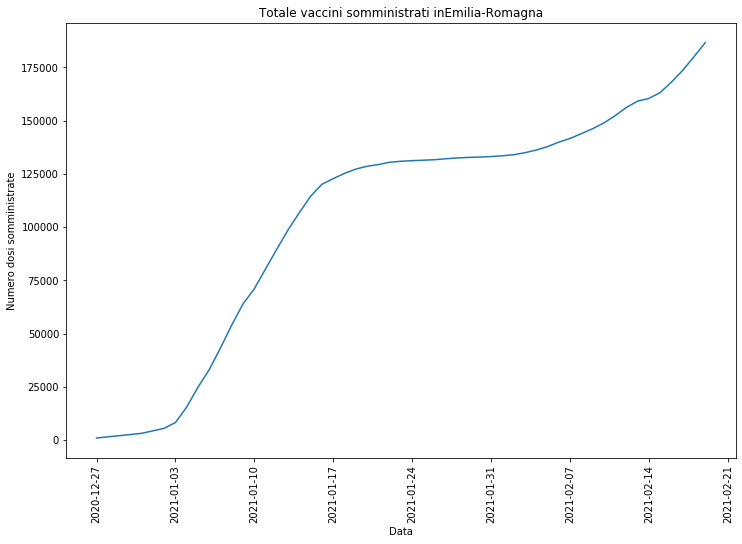

In [4]:
def get_daily_stats(rg,pop):
    rg = rg.groupby([rg['data_somministrazione'].dt.date]).sum()
    dates =  rg.index.values
    tot = 0
    cum = []
    over_pop = []

    for i in range(len(rg["prima_dose"])):
        tot += rg["prima_dose"].iloc[i]
        cum.append(tot)
        over_pop.append(tot/pop*100)
    return cum, over_pop, dates

cum, over_pop, dates = get_daily_stats(rg,pop)

# Plot results
plt.figure(figsize=(12,8))
plt.plot(dates, cum)
ax = plt.subplot(111)

plt.title('Totale vaccini somministrati in' + regione)
plt.xlabel('Data')
plt.ylabel('Numero dosi somministrate')
plt.xticks(rotation=90)
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
plt.show()

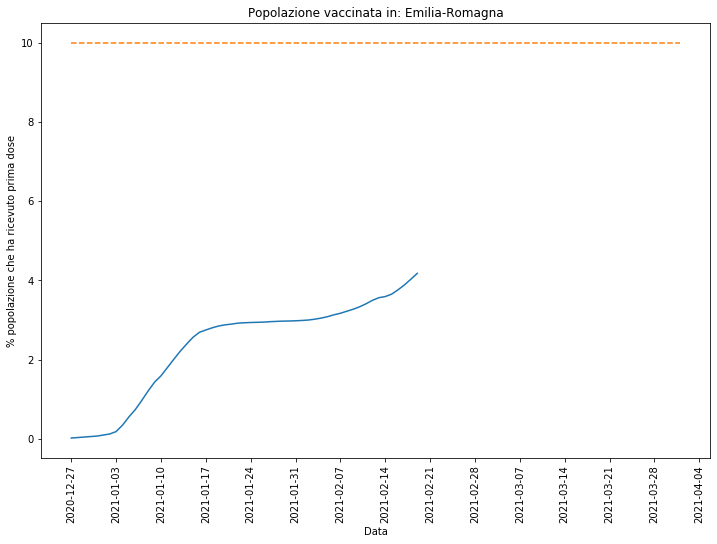

In [5]:
# Plot results
target = [target_perc_pop_vax for x in range(len(dates)+1)]
dates = dates.tolist()
dates.append(target_date)
# Plot results
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(dates[:-1], over_pop)
ax.plot(dates, target, '--')
plt.title('Popolazione vaccinata in: ' + regione)
plt.xlabel('Data')
plt.ylabel('% popolazione che ha ricevuto prima dose')
plt.xticks(rotation=90)
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
plt.show()

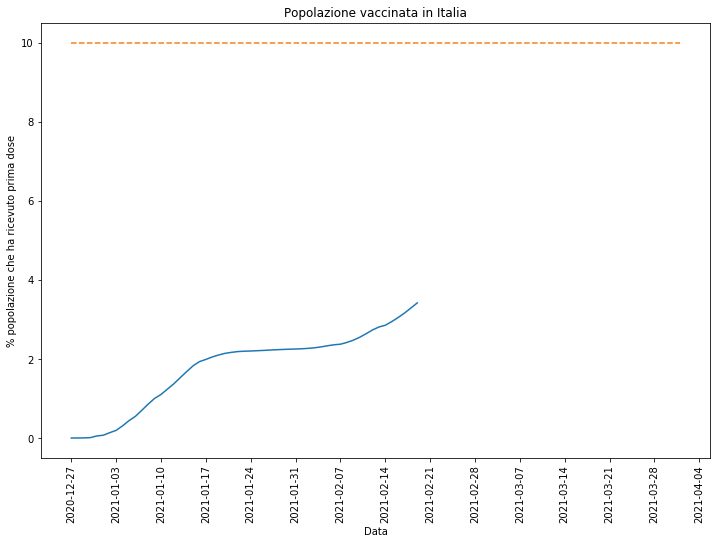

In [6]:
# All Italy

cum, over_pop,dates = get_daily_stats(df,it_pop)
target = [target_perc_pop_vax for x in range(len(dates)+1)]
dates = dates.tolist()
dates.append(target_date)
# Plot results
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(dates[:-1], over_pop)
ax.plot(dates, target, '--')
plt.title('Popolazione vaccinata in Italia')
plt.xlabel('Data')
plt.ylabel('% popolazione che ha ricevuto prima dose')
plt.xticks(rotation=90)

ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
plt.show()